In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn; seaborn.set()
from datetime import datetime
# the seaborn makes things prettier

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.facecolor'] = 'white'
# We can use any of the ones here: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
# plt.style.use('ggplot') is popular

note that when we have " num_cols = df.describe() " it describes the numeric columns, therefore, when we assign it to a variable, so num_cols.columns gives us an array of numeric columns of the df.

In [38]:
# using one of the unclean files for now. YOU NEED TO UPDATE THE PATH TO RUN THIS FILE!!!

path = "Jupyter_Notebooks_and_Data/Monthly_Counts_of_Deaths_by_Select_Causes__2014-2019.csv"


data = pd.read_csv(path, parse_dates=True)
data["Year"] = data["Year"].astype(str)
data["Month"] = data["Month"].astype(str)
data["date"] = data["Year"] + " " + data["Month"]
data["Year"] = data["Year"].astype(int)
data["Month"] = data["Month"].astype(int)
data.date = data["date"].map(lambda x: datetime.strptime(x,"%Y %m"))
data["Time_Axis"] = data["date"].map(lambda x: datetime.strftime(x,"%b-%Y"))
data = data.set_index(["Time_Axis"])
data.index = pd.to_datetime(data.index, format="%b-%Y")
data = data.sort_values(by ="date")
data = data.drop(columns=["All Cause","Natural Cause", "Other Diseases of Respiratory System", "Septicemia", "Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified", "Jurisdiction of Occurrence", "Influenza and Pneumonia", "date", "Drug Overdose","Assault (Homicide)", "Intentional Self-Harm (Suicide)", "Motor Vehicle Accidents", "Accidents (Unintentional Injuries)"])
data["TotalChronic"] = data[["Malignant Neoplasms", "Diabetes Mellitus",	"Alzheimer Disease","Chronic Lower Respiratory Diseases","Nephritis, Nephrotic Syndrome, and Nephrosis","Diseases of Heart","Cerebrovascular Diseases"]].sum(axis=1)
data.head(5)

,Year,Month,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Diseases of Heart,Cerebrovascular Diseases,TotalChronic
Time_Axis,,,,,,,,,,
2014-01-01,2014,1,51101,7344,8305,15078,4600,58229,12074,156731
2014-02-01,2014,2,45558,6443,7315,12747,4064,50435,10780,137342
2014-03-01,2014,3,50646,6738,7999,13493,4300,54347,11395,148918
2014-04-01,2014,4,48304,6343,7117,12573,3902,50954,10773,139966
2014-05-01,2014,5,49497,6272,7266,12281,3980,50810,10963,141069


In [66]:
# THIS IS NEW CODE WORKING ON YEAR AVERAGES AND STANDARDISATION - it goes on all teh way to where I calculate the standardized_seasonality DF 
data["Year"] = data["Year"].astype(int)
data["Month"] = data["Month"].astype(int)
year_avg = data.groupby(["Year"]).mean()
year_avg.drop(columns = "Month", inplace = True)

year_stddev = data.groupby(["Year"]).std()
year_stddev.drop(columns = "Month", inplace = True)
year_stddev
year_avg # we should look at how annual averages change

,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Diseases of Heart,Cerebrovascular Diseases,TotalChronic
Year,,,,,,,,
2014,49308.333333,6374.000000,7795.083333,12258.416667,4012.166667,51195.666667,11091.916667,142035.583333
2015,49660.833333,6627.916667,9213.416667,12920.083333,4163.250000,52820.166667,11693.583333,147099.250000
2016,49836.500000,6671.500000,9675.250000,12883.000000,4170.500000,52938.333333,11845.166667,148020.250000
2017,49925.666667,6963.666667,10117.000000,13350.083333,4219.416667,53954.750000,12198.583333,150729.166667
2018,49939.500000,7078.833333,10168.250000,13290.500000,4282.166667,54615.083333,12317.500000,151691.833333
2019,49966.750000,7303.916667,10124.916667,13081.583333,4297.083333,54920.083333,12500.416667,152194.750000


In [72]:
year_totals = data.groupby(["Year"]).sum()
share_byYear = year_totals.divide(year_totals["TotalChronic"], axis = 0)
share_byYear.head(5)

,Month,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Diseases of Heart,Cerebrovascular Diseases,TotalChronic
Year,,,,,,,,,
2014,0.000046,0.347155,0.044876,0.054881,0.086305,0.028248,0.360443,0.078093,1.0
2015,0.000044,0.337601,0.045057,0.062634,0.087832,0.028302,0.359078,0.079495,1.0
2016,0.000044,0.336687,0.045072,0.065364,0.087035,0.028175,0.357643,0.080024,1.0
2017,0.000043,0.331228,0.046200,0.067120,0.088570,0.027993,0.357958,0.080930,1.0
2018,0.000043,0.329217,0.046666,0.067032,0.087615,0.028229,0.360040,0.081201,1.0


In [40]:
share_byMonth = data.divide(data["TotalChronic"], axis = 0)
share_byMonth.head(5)

,Year,Month,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Diseases of Heart,Cerebrovascular Diseases,TotalChronic
Time_Axis,,,,,,,,,,
2014-01-01,0.012850,0.000006,0.326043,0.046857,0.052989,0.096203,0.029350,0.371522,0.077036,1.0
2014-02-01,0.014664,0.000015,0.331712,0.046912,0.053261,0.092812,0.029590,0.367222,0.078490,1.0
2014-03-01,0.013524,0.000020,0.340093,0.045246,0.053714,0.090607,0.028875,0.364946,0.076519,1.0
2014-04-01,0.014389,0.000029,0.345112,0.045318,0.050848,0.089829,0.027878,0.364046,0.076969,1.0
2014-05-01,0.014277,0.000035,0.350871,0.044461,0.051507,0.087057,0.028213,0.360178,0.077714,1.0


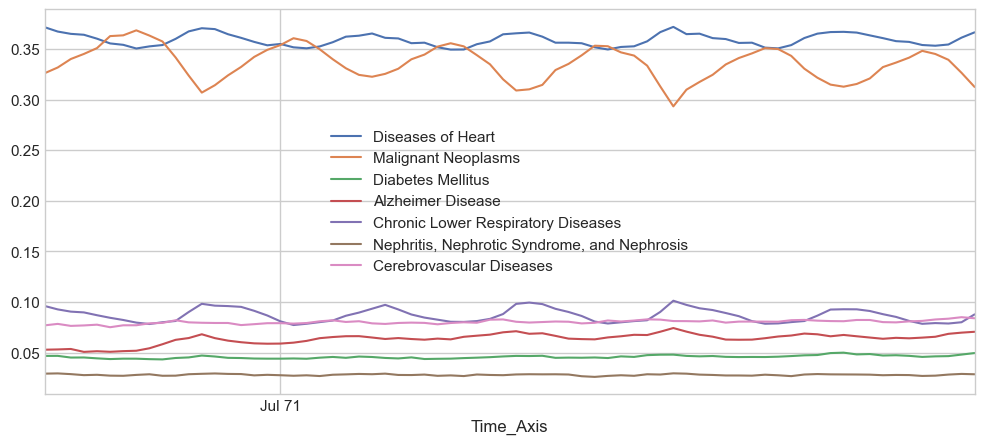

In [41]:
a = share_byMonth.plot( y = ["Diseases of Heart", "Malignant Neoplasms","Diabetes Mellitus","Alzheimer Disease","Chronic Lower Respiratory Diseases", "Nephritis, Nephrotic Syndrome, and Nephrosis","Cerebrovascular Diseases"], stacked = False, figsize = (12,5)); 
a.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %y'))
a.xaxis.set_major_locator(matplotlib.dates.MonthLocator(bymonth = [1,7]))
a.legend(loc = "center");

In [42]:
averages = data.copy(deep = True)
column_count = year_avg.shape[1]
year_count = year_avg.shape[0]

k = 0
while k < column_count:
    y = 2014
    name = year_avg.columns.values[k]
    while y < 2020:
        mu = year_avg.loc[y, name]
        #ratios[name] = np.where(ratios["Year"] == y, mu) Does exactly teh same as the below line - I could not decide
        averages.loc[ averages["Year"] == y, name ] = mu.astype(int)  #I am for now filling the ratios df with teh corresponding year averages so I can apply elementwise division later
        y = y+1
    k = k+1
averages.head(5)


,Year,Month,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Diseases of Heart,Cerebrovascular Diseases,TotalChronic
Time_Axis,,,,,,,,,,
2014-01-01,2014,1,49308,6374,7795,12258,4012,51195,11091,142035
2014-02-01,2014,2,49308,6374,7795,12258,4012,51195,11091,142035
2014-03-01,2014,3,49308,6374,7795,12258,4012,51195,11091,142035
2014-04-01,2014,4,49308,6374,7795,12258,4012,51195,11091,142035
2014-05-01,2014,5,49308,6374,7795,12258,4012,51195,11091,142035


In [43]:
deviations = data.copy(deep = True)
column_count = year_stddev.shape[1]
year_count = year_stddev.shape[0]

k = 0
while k < column_count:
    y = 2014
    name = year_stddev.columns.values[k]
    while y < (2020):
        sdev = year_stddev.loc[y, name]
        deviations.loc[ deviations["Year"] == y, name ] = sdev.astype(int) 
        y = y+1
    k = k+1
deviations.head(5)

,Year,Month,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Diseases of Heart,Cerebrovascular Diseases,TotalChronic
Time_Axis,,,,,,,,,,
2014-01-01,2014,1,1604,500,1025,1437,314,3924,786,8619
2014-02-01,2014,2,1604,500,1025,1437,314,3924,786,8619
2014-03-01,2014,3,1604,500,1025,1437,314,3924,786,8619
2014-04-01,2014,4,1604,500,1025,1437,314,3924,786,8619
2014-05-01,2014,5,1604,500,1025,1437,314,3924,786,8619


In [44]:
standart_spread = (data.sub(averages)).div(deviations)
standart_spread.head(5)

,Year,Month,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Diseases of Heart,Cerebrovascular Diseases,TotalChronic
Time_Axis,,,,,,,,,,
2014-01-01,0.0,0.0,1.117830,1.940,0.497561,1.962422,1.872611,1.792559,1.250636,1.705070
2014-02-01,0.0,0.0,-2.337905,0.138,-0.468293,0.340292,0.165605,-0.193680,-0.395674,-0.544495
2014-03-01,0.0,0.0,0.834165,0.728,0.199024,0.859429,0.917197,0.803262,0.386768,0.798585
2014-04-01,0.0,0.0,-0.625935,-0.062,-0.661463,0.219207,-0.350318,-0.061417,-0.404580,-0.240051
2014-05-01,0.0,0.0,0.117830,-0.204,-0.516098,0.016006,-0.101911,-0.098114,-0.162850,-0.112078


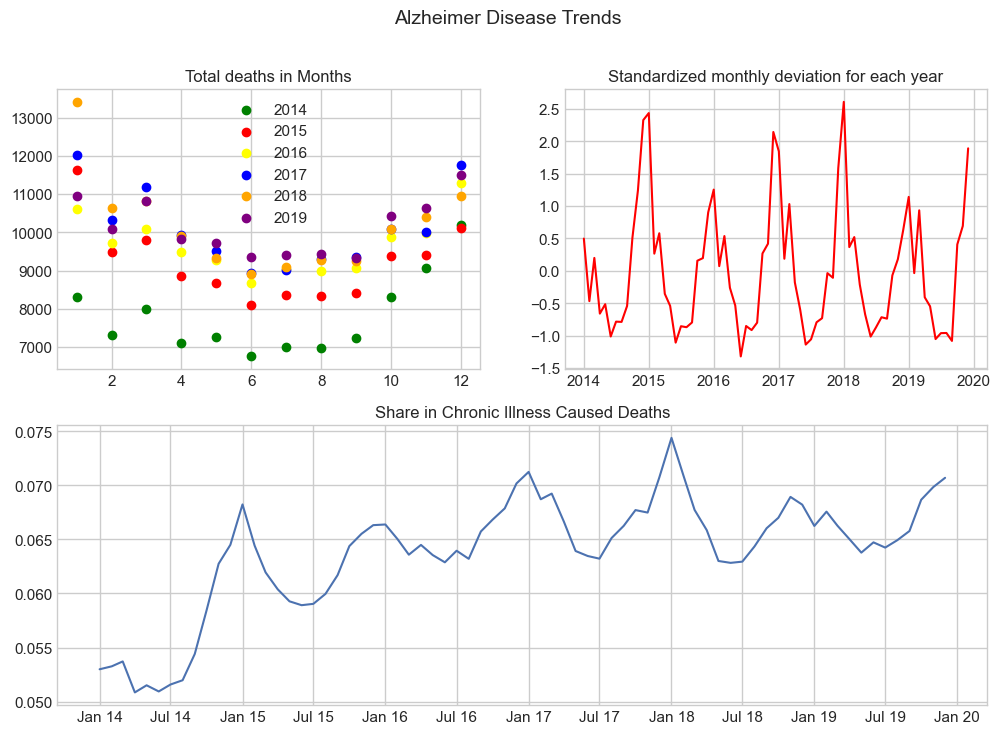

In [46]:
# alz_fig = plt.figure(figsize = (12,8))
# alz_fig.suptitle("Alzheimer Disease Trends", fontsize=14)

# alz_ax1 = alz_fig.add_subplot(2,2,1)
# alz_ax2 = alz_fig.add_subplot(2,2,2)
# alz_ax3 = alz_fig.add_subplot(2,2,(3,4))
# #alz_ax4 = alz_fig.add_subplot(2,2,4)

# colors = {2014: "green", 2015: "red", 2016: "yellow", 2017: "blue", 2018: "orange", 2019: "purple"}
# for i in colors:
#     alz_ax1.scatter(y = data.loc[data["Year"]== i,"Alzheimer Disease"], x = data.loc[data["Year"]== i,"Month"], c = colors[i], label = i) 
# alz_ax1.legend(loc = "best")
# alz_ax1.set_title("Total deaths in Months")

# alz_ax3.plot(share_byMonth["Alzheimer Disease"])

# alz_ax3.set_title("Share in Chronic Illness Caused Deaths")

# alz_ax3.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %y'))
# alz_ax3.xaxis.set_major_locator(matplotlib.dates.MonthLocator(bymonth = [1,7]))

# alz_ax2.plot(standart_spread["Alzheimer Disease"], c = "red") # the seasonality impact drop is interesting - milder winter years?
# alz_ax2.set_title("Standardized monthly deviation for each year");

In [47]:
column_count = data.shape[1]
i = 2 # i is our starting column, as we will not plot the months and years
while i < column_count:
    data.iloc[:,i] = data.iloc[:,i].astype(int)
    i=i+1

In [50]:
data.columns.values[2] # this function returns columns names, which are useful for automatic usage of column names in titles and legends

'Malignant Neoplasms'

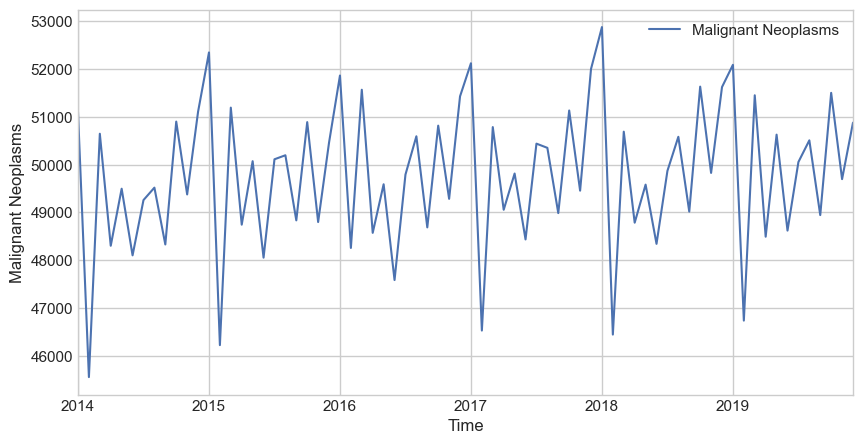

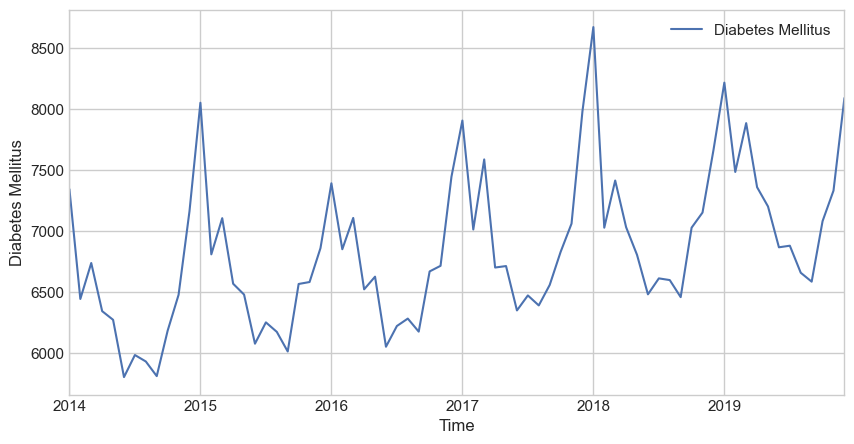

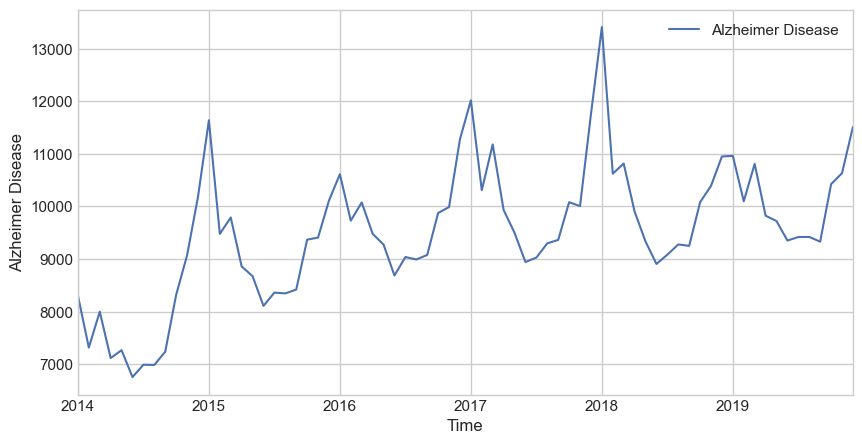

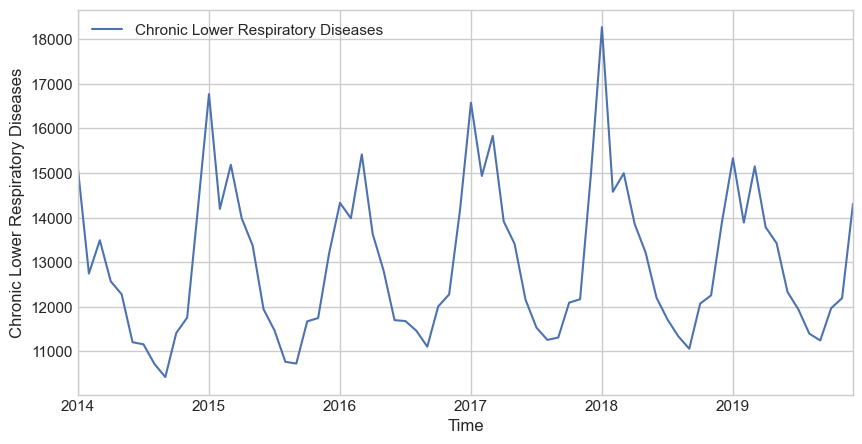

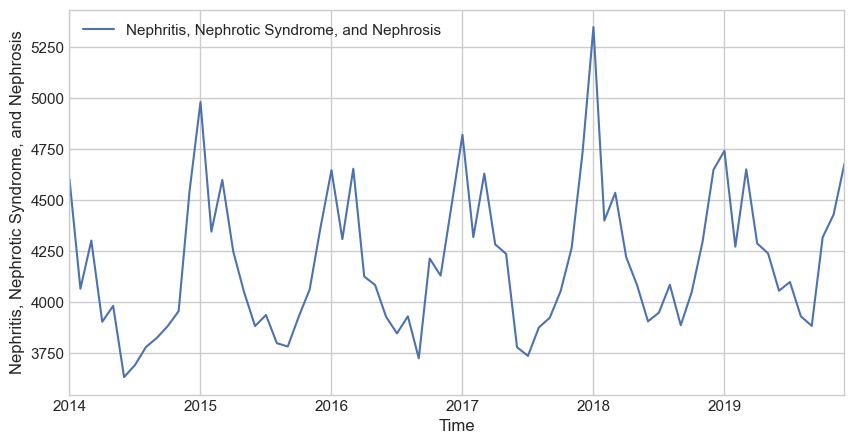

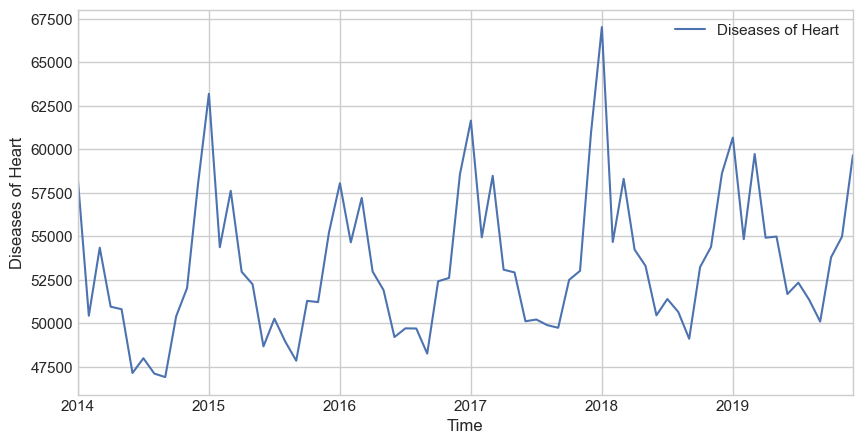

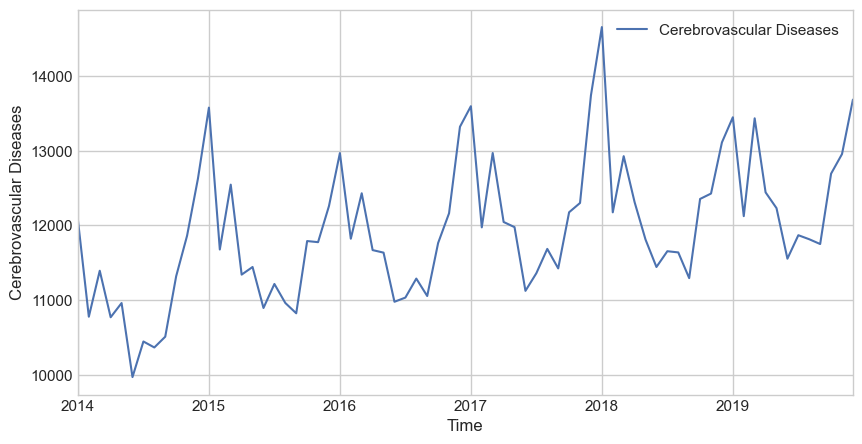

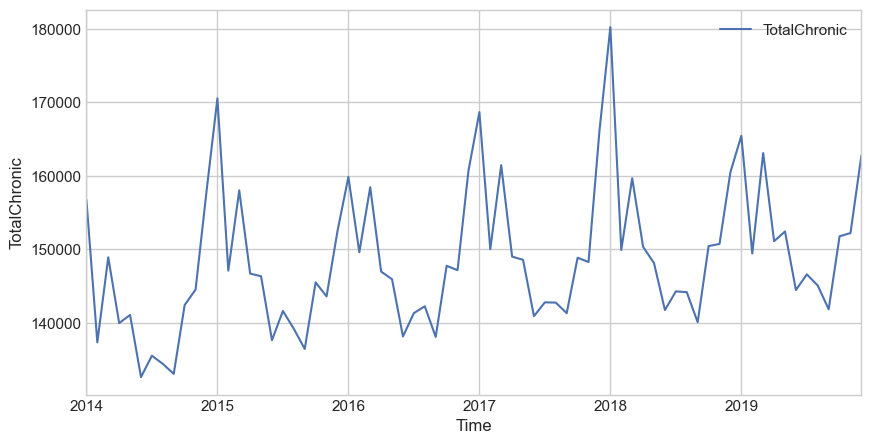

In [51]:
column_count = data.shape[1]
i = 2 # i is our starting column, as we will not plot the months and years
while i < column_count:
    name = data.columns.values[i]
    data.plot( y = i, xlabel = "Time", ylabel = data.columns.values[i], figsize=(10, 5)); # a line plot of all of the data input
    plt.savefig(name, format="png" )
    i=i+1
# Assumes that column names are properly formatted
#df.plot(kind="bar", figsize=(9, 8))
#df.plot(style = [':', '--', '-'])
#births.pivot_table('births','dayofweek','decade', aggfunc='mean').plot();

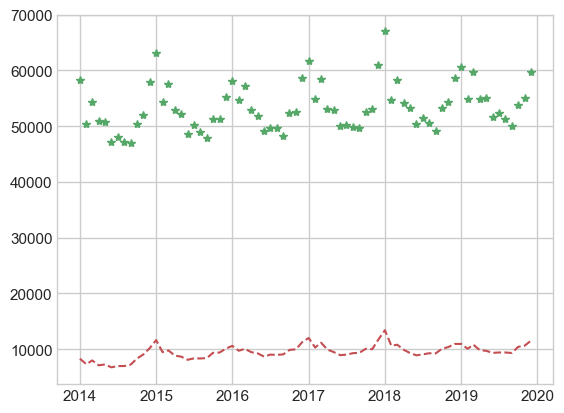

In [53]:
plt.plot(data["Alzheimer Disease"], 'r--', data["Diseases of Heart"], 'g*');

0.8820624238677193

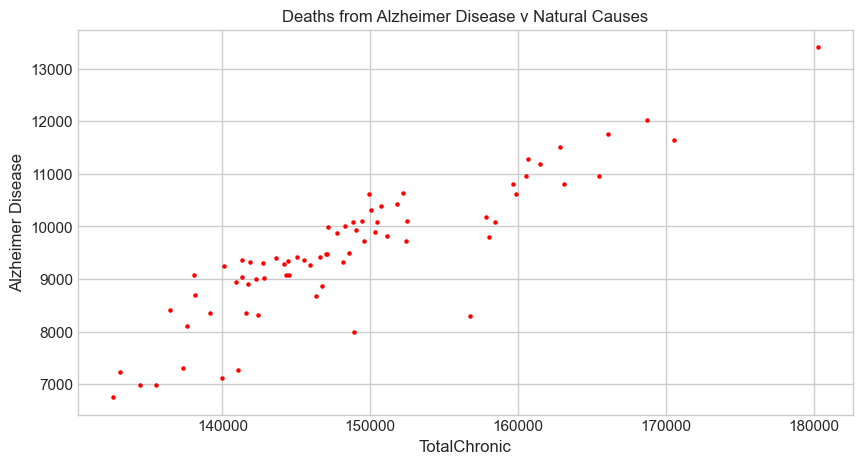

In [82]:
data.plot( x = "TotalChronic", y = "Alzheimer Disease", kind = "scatter", xlabel = 'TotalChronic', ylabel = 'Alzheimer Disease', title = 'Deaths from Alzheimer Disease v Natural Causes', figsize=(10, 5), alpha = 1, s = 5, c = "red")
data["TotalChronic"].corr(data["Alzheimer Disease"])

0.9892397071561733

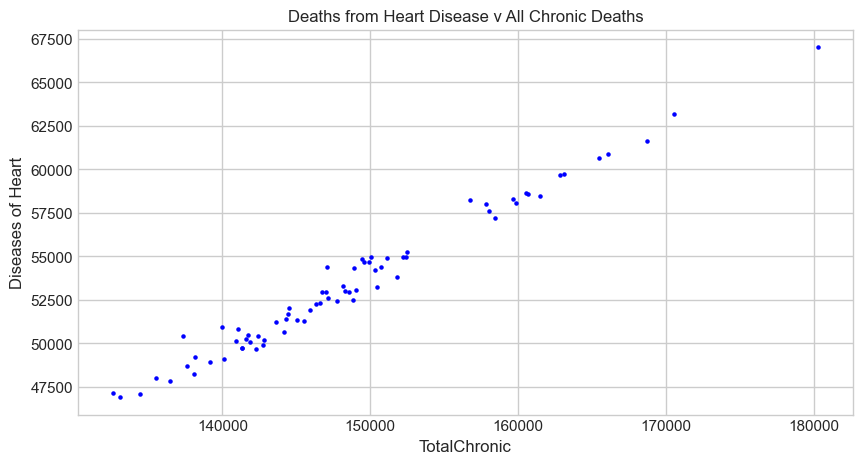

In [81]:
data.plot( x = "TotalChronic", y = "Diseases of Heart", kind = "scatter", xlabel = 'TotalChronic', ylabel = 'Diseases of Heart', title = 'Deaths from Heart Disease v All Chronic Deaths', figsize=(10, 5), alpha = 1, s = 5, c = "blue")
data["TotalChronic"].corr(data["Diseases of Heart"])

In [85]:
by_year = data.reindex()
by_year.set_index(["Year", "Month"], inplace=True)
by_year

Malignant Neoplasms  Diabetes Mellitus  Alzheimer Disease  \
Year Month                                                              
2014 1                    51101               7344               8305   
     2                    45558               6443               7315   
     3                    50646               6738               7999   
     4                    48304               6343               7117   
     5                    49497               6272               7266   
...                         ...                ...                ...   
2019 8                    50508               6658               9420   
     9                    48945               6585               9330   
     10                   51501               7082              10423   
     11                   49697               7332              10632   
     12                   50878               8092              11511   

            Chronic Lower Respiratory Diseases  \
Year Month                                       
2014 1                                   15078   
     2                                   12747   
     3                                   13493   
     4                                   12573   
     5                                   12281   
...                                        ...   
2019 8                                   11399   
     9                                   11247   
     10                                  11970   
     11                                  12196   
     12                                  14309   

            Nephritis, Nephrotic Syndrome, and Nephrosis  Diseases of Heart  \
Year Month                                                                    
2014 1                                              4600              58229   
     2                                              4064              50435   
     3                                              4300              54347   
     4                                              3902              50954   
     5                                              3980              50810   
...                                                  ...                ...   
2019 8                                              3929              51346   
     9                                              3882              50100   
     10                                             4316              53795   
     11                                             4427              54979   
     12                                             4678              59663   

            Cerebrovascular Diseases  TotalChronic  
Year Month                                          
2014 1                         12074        156731  
     2                         10780        137342  
     3                         11395        148918  
     4                         10773        139966  
     5                         10963        141069  
...                              ...           ...  
2019 8                         11816        145076  
     9                         11752        141841  
     10                        12693        151780  
     11                        12955        152218  
     12                        13683        162814  

[72 rows x 8 columns]

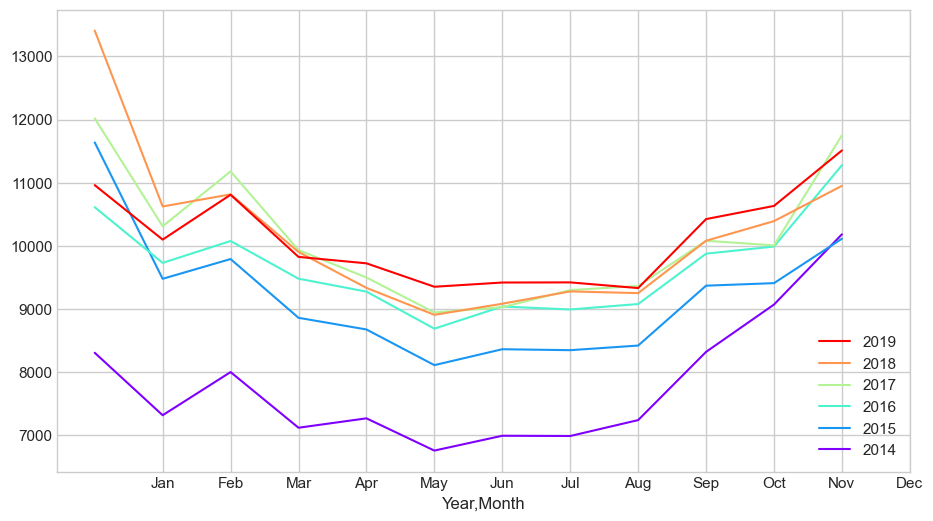

In [151]:
years = by_year["Alzheimer Disease"].groupby(level=0)
colors = plt.cm.rainbow(np.linspace(0, 1, len(years)))
fig, ax = plt.subplots(figsize=(11, 6))

for (year,group), color in zip(years, colors):
    group.plot(ax = ax, color = color, label = year);

import calendar
ax.set_xticks(group.index.levels[1]);
ax.set_xticklabels([calendar.month_abbr[month] for month in group.index.levels[1]]);
ax.legend(reverse = True);
#ax.set_xticks(np.arange(1, 13))
#ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])



In [ ]:
alz_ax2 = alz_fig.add_subplot(2,1,2)
alz_ax2.plot(standart_spread["Alzheimer Disease"], c = "red") # the seasonality impact drop is interesting - milder winter years?
alz_ax2.set_title("Standardized monthly deviation for each year");